In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')

In [53]:
df = pd.read_csv("EcommerceCustomers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [54]:
df.isna().any() 

Email                   False
Address                 False
Avatar                  False
Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

значений NaNнет

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [56]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Как распределена  годовая сумма расходов?

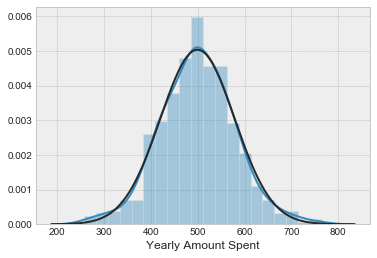

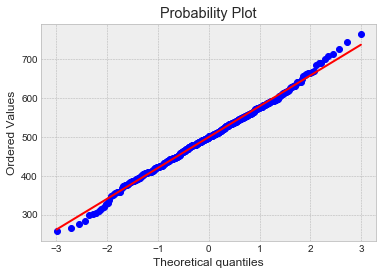

In [57]:
from scipy import stats
from scipy.stats import norm

sns.distplot(df['Yearly Amount Spent'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Yearly Amount Spent'], plot=plt)

In [58]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O')]

In [59]:
df = df.select_dtypes(include = 'float64')
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [69]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

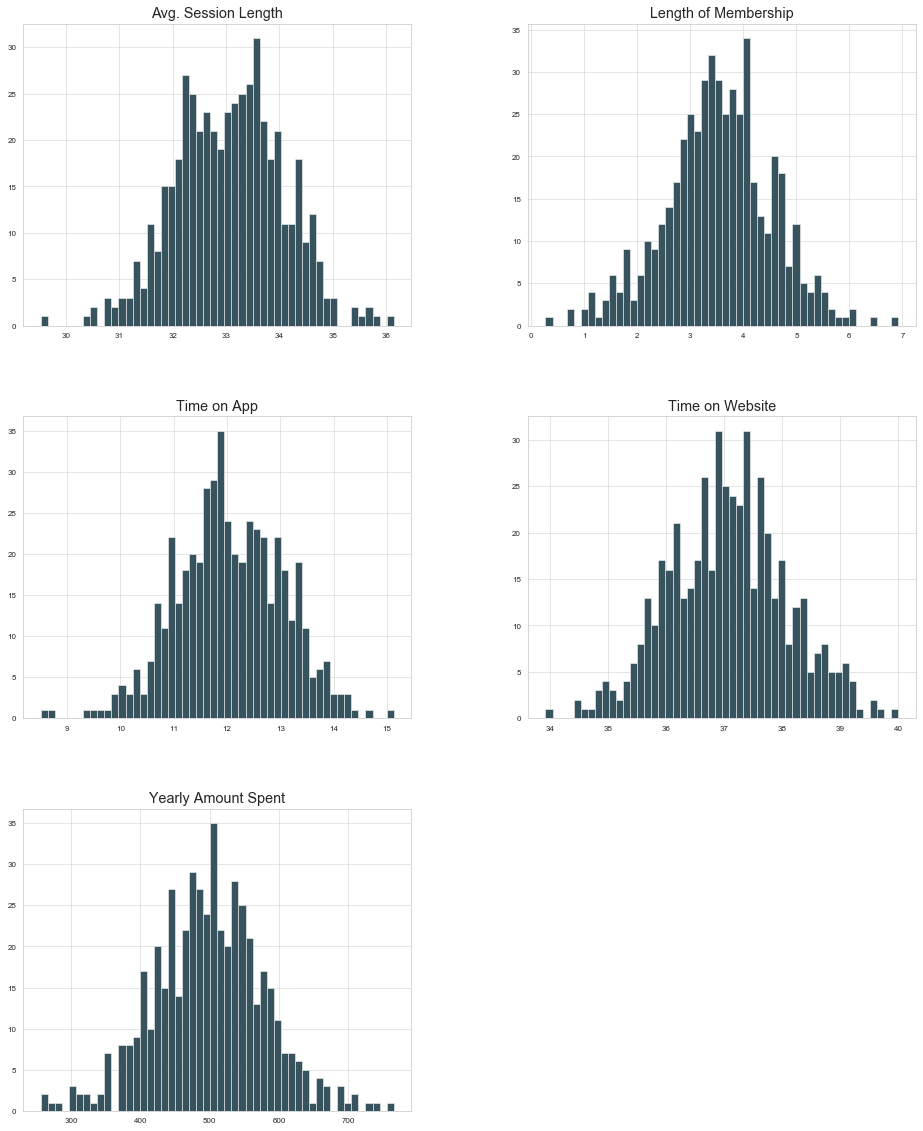

In [70]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [61]:
corr_data = df.corr()['Yearly Amount Spent'][:-1]
correlated_features_list = corr_data[abs(corr_data) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Yearly Amount Spent:\n{}".format(len(correlated_features_list), 
                                                                          correlated_features_list))

There are 1 strongly correlated values with Yearly Amount Spent:
Length of Membership    0.809084
Name: Yearly Amount Spent, dtype: float64


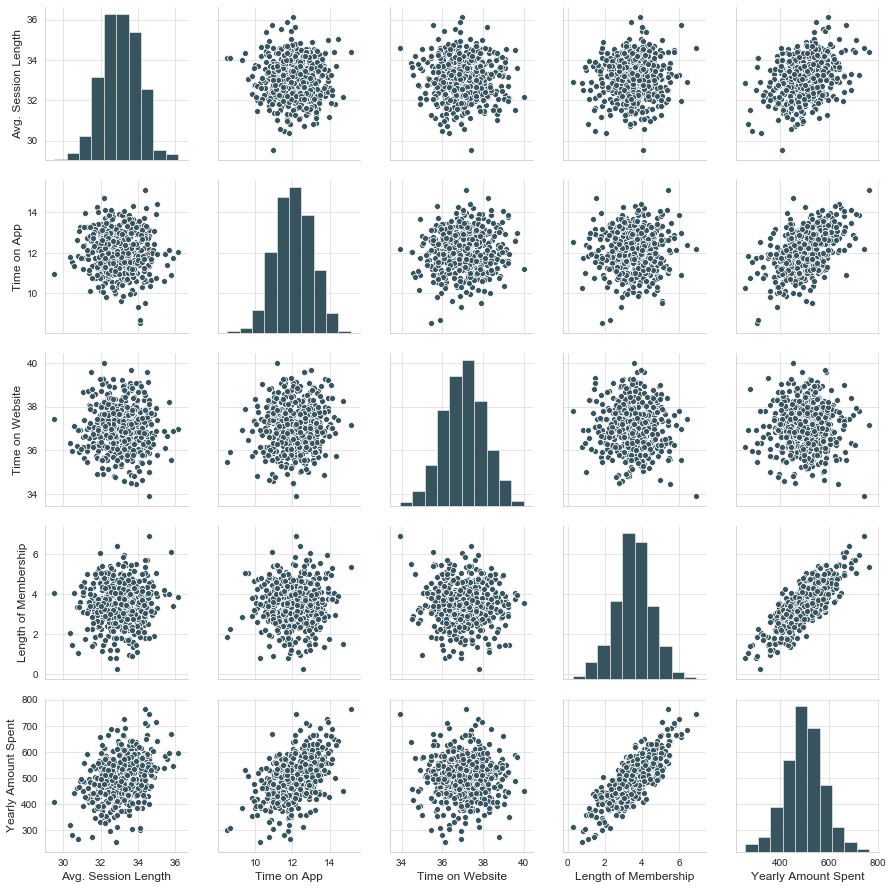

In [63]:
sns.pairplot(df)

По графикам так же видно что сильную корреляцию  имеет Length of Membership с Yearly Amount Spent

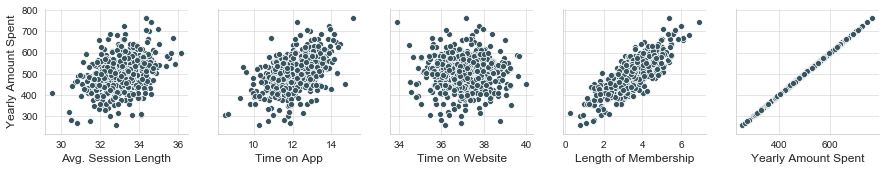

In [64]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['Yearly Amount Spent'])

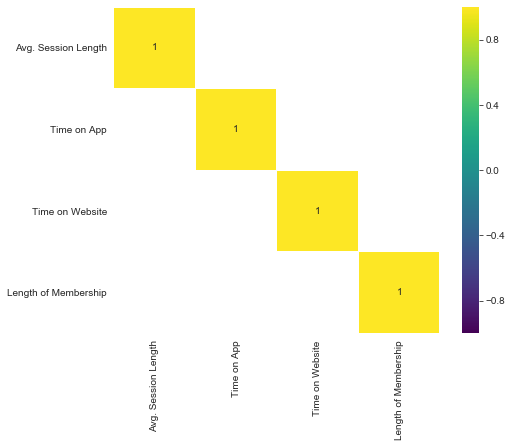

In [65]:
corr = df.drop('Yearly Amount Spent', axis=1).corr() # We've already examined SalePrice correlations
plt.figure(figsize=(8, 6))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);

Многие признаки коррелируют между собой.

## Q -> Q (Quantitative to Quantitative relationship)

In [66]:
quantitative_features_list = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [67]:
features_to_analyse = [x for x in quantitative_features_list if x in correlated_features_list]
features_to_analyse.append('Yearly Amount Spent')
features_to_analyse

['Length of Membership', 'Yearly Amount Spent']

Посмотрим на regression plots для выбранных данных

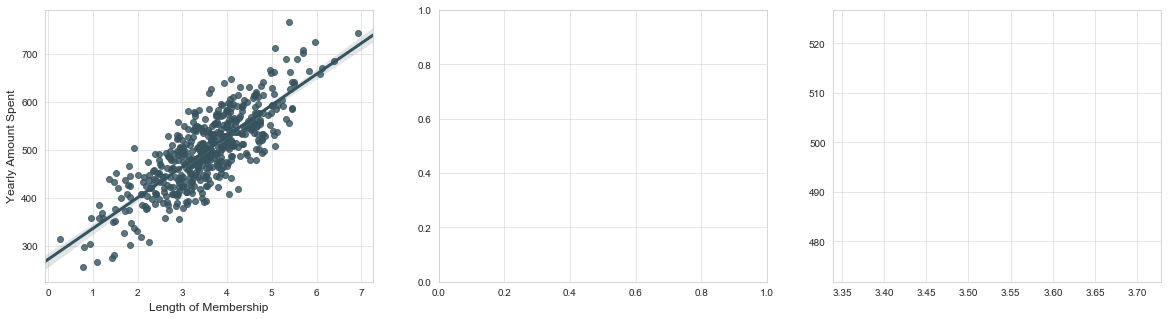

In [68]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (20, 5))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i], y='Yearly Amount Spent', data=df[features_to_analyse], ax=ax)

Только первый график подходит для построения модели.